In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants

plt.rcParams["font.family"] = "DejaVu Sans"

Recall that in PHYS 207, you were often asked to plot displacement as a function of time. For example, for a baseball thrown directly upward you would plot
, and for a block on a horizontal spring you would plot
. Here we will examine how the displacement and time axes "scissor together" at relativistic speeds.

The convention in relativity is to reverse the axes: *ct* is vertical and
*x* is horizontal. Time moves forward from the bottom to the top of the plot:

(-1.0, 1.0, -1.0, 1.0)

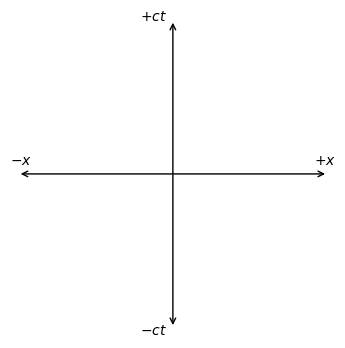

In [20]:
plt.figure(figsize=(4,4))
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.annotate(text='', xy=(-1,0), xytext=(1,0), arrowprops=dict(arrowstyle='<->'))
plt.annotate(text='', xy=(0,-1), xytext=(0,1), arrowprops=dict(arrowstyle='<->'))
plt.text(0.98, 0.04, r"$+x$", horizontalalignment='center', verticalalignment='bottom')
plt.text(-0.98, 0.04, r"$-x$", horizontalalignment='center', verticalalignment='bottom')
plt.text(-0.04, 1.02, r"$+ct$", horizontalalignment='right', verticalalignment='center')
plt.text(-0.04, -1.02, r"$-ct$", horizontalalignment='right', verticalalignment='center')
plt.axis('off')

Imagine that frame *K'* is moving in the *+x* direction at speed *v* relative to frame *K*. You are at rest in frame *K*. Let's figure out how the set of (*x', ct'*) axes would look to you when the frames' origins O and O' coincide.

1) Use the fact that *x'* = 0 on the *ct*' axis to define a line *ct(x)* in frame *K* that follows the *ct*' axis. Write a function that computes points on the line. *v* will be one of your function inputs.

In [21]:
#defining constants
lightspeed = constants.c

In [22]:
def fun1(v, x_vals):
  beta = v/lightspeed
  if beta == 0:
    raise ValueError("Velocity must be nonzero")
  return x_vals/beta

2) Use the fact that *ct'* = 0 on the *x'* axis to define a line *ct(x)* that traces the *x'* axis in frame *K*. Write a second function that computes points on this line.

In [23]:
def fun2(v, x_vals):
  beta = v/lightspeed
  return beta*x_vals

3) The code below creates a figure with centered (*x, ct*) axes that have range (-10^10, 10^10)m. We are using *ct* instead of just *t* on our vertical axis so that both axes have the same units. Use your functions from problems 1 and 2 to overplot the *ct'* and *x'* axes as a function of *x* for *v* = 0.2c. Make your *ct'* and *x'* axes red, and label them in red. Also add black labels to the *(x, ct)* axes giving the coordinate name (*x* or *ct*) and the units.

> Add blockquote



Text(9000000000.0, 2000000000.0, "x'")

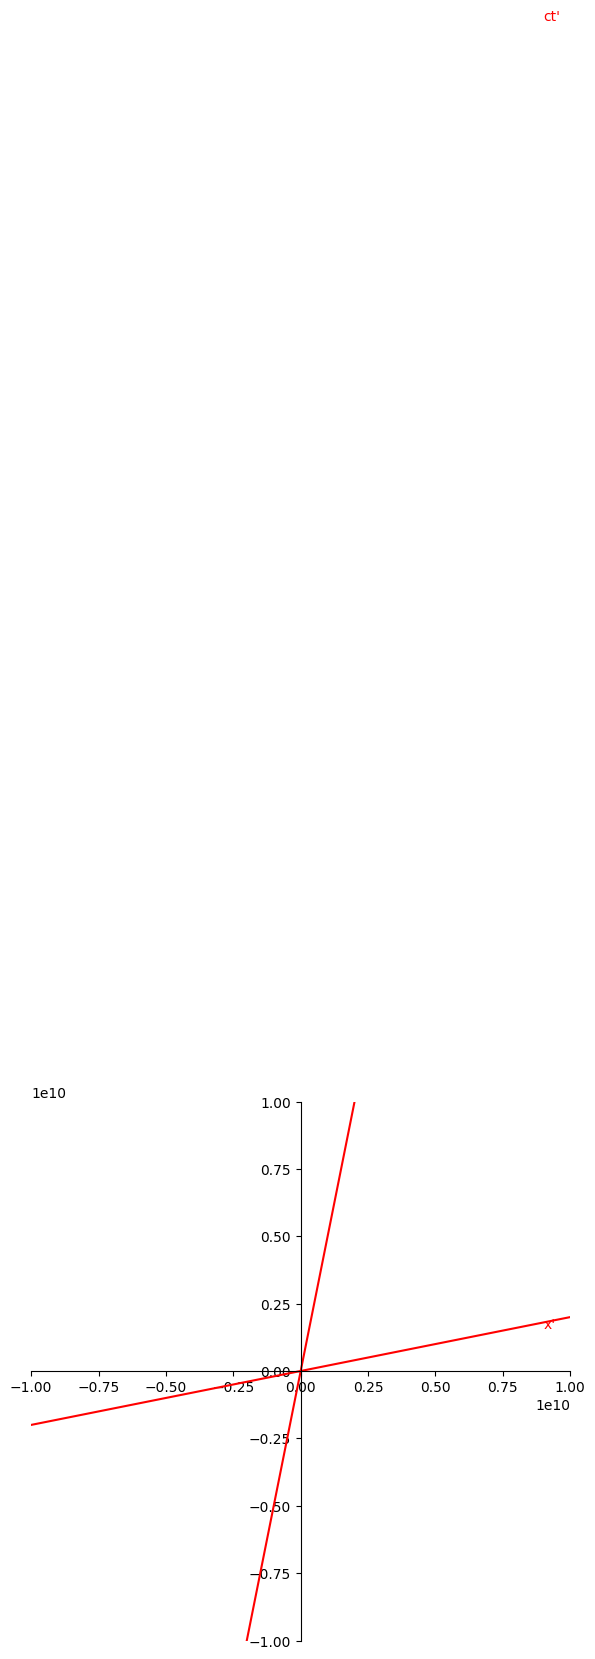

In [24]:
# Set up an array of independent variables x that spans (-1e10, 1e10) m
x = np.linspace(0, 2e10, num=201, endpoint=True) - 1e10
v = 0.2 * lightspeed #Given velocity 0.2c

#Compute the necessary values using the defined functions
ct_values = fun1(v, x)
xprime_values = fun2(v, x)

# Make a figure
fig, ax = plt.subplots(figsize=(7,7))

# YOUR CODE HERE: Use ax.plot() to plot the ct' and x' axes below
ax.plot(x, ct_values, color='red', label="ct'")
ax.plot(x, xprime_values, color='red', label="x'")

# Move the left and bottom "spines" (borders of the plot) to the center
# This makes a math textbook-like set of (x,ct) axes instead of a box around the plot
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))

# Take out the top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Make the two axes have the same scale
ax.set_aspect('equal')

# Set the axes ranges
ax.set_xlim([-1e10, 1e10])
ax.set_ylim([-1e10, 1e10])

# YOUR CODE HERE: Use ax.text() to add RED labels to the ct' and x' axes below
ax.text(0.9e10, ct_values[-1], "ct'", color='red', verticalalignment='bottom')
ax.text(0.9e10, xprime_values[-1], "x'", color='red', verticalalignment='top')

4) Make a figure that plots *ct'* and *x'* axes for *v = 0.25c*, *v = 0.5*, and *v = 0.75c*. Use different colors for each pair of axes. Make a legend that shows which value of *v* corresponds to each color. Label the (*x, ct*) axes and add units.

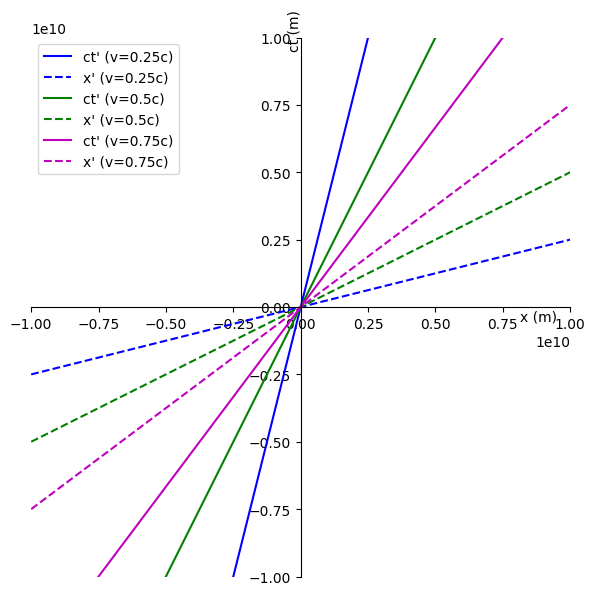

In [25]:
x = np.linspace(0, 2e10, num=201, endpoint=True) - 1e10
velocities = [0.25, 0.5, 0.75]  # Given velocities as fractions of c
colors = ['b', 'g', 'm']  # Colors for different velocities

fig, ax = plt.subplots(figsize=(7,7))

for v, color in zip(velocities, colors):
    ct_vals = fun1(v * lightspeed, x)
    x_prime_vals = fun2(v * lightspeed, x)
    ax.plot(x, ct_vals, color, label=f"ct' (v={v}c)")
    ax.plot(x, x_prime_vals, color, linestyle='dashed', label=f"x' (v={v}c)")

ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_aspect('equal')

ax.set_xlim([-1e10, 1e10])
ax.set_ylim([-1e10, 1e10])

ax.text(9.5e9, -0.5e9, "x (m)", color='black', horizontalalignment='right')
ax.text(-0.5e9, 9.5e9, "ct (m)", color='black', verticalalignment='bottom', rotation=90)

ax.legend()

plt.show()

5) Connect your graph from problem 4 with the discussion of world lines in Chapter 2 of your textbook. What kind of world line do your (*x', ct'*) axes approach as *v --> c*? Create a similar plot to problem 4, but this time plot (*x', ct'*) axes for *v = 0.5, 0.75, 0.875, 0.9375*. To illustrate the concept of taking a limit as *v --> c*, make each set of (*x', ct'*) axes a successively darker shade of gray. Plot the limiting world line in black. Add a legend to show which value of *v* corresponds to which shade of gray. You may find it helpful to specify line colors like this: color='0.7'.

**Answer:** As v approaches c, the x' and ct' prime axes look like they tend to approach the worldlines of light.

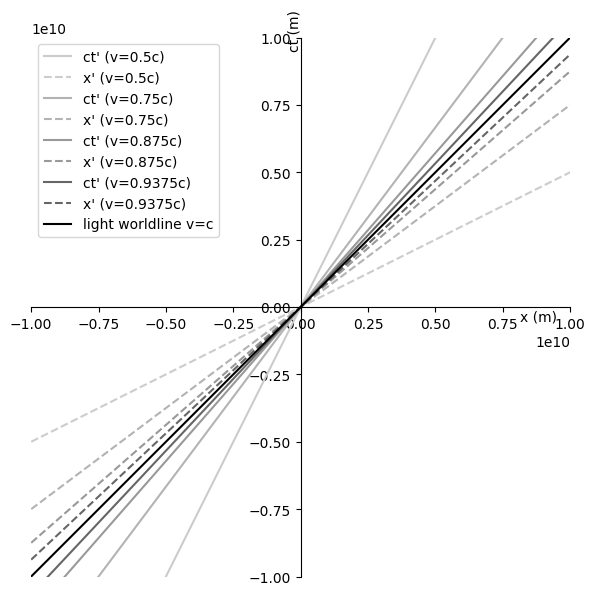

In [18]:
x = np.linspace(0, 2e10, num=201, endpoint=True) - 1e10
velocities = [0.5, 0.75, 0.875, 0.9375,]  # Given velocities as fractions of c
colors = ['0.8', '0.7', '0.6', '0.4']  # Colors for different velocities

fig, ax = plt.subplots(figsize=(7,7))

for v, color in zip(velocities, colors):
    ct_vals = fun1(v * lightspeed, x)
    x_prime_vals = fun2(v * lightspeed, x)
    ax.plot(x, ct_vals, color, label=f"ct' (v={v}c)")
    ax.plot(x, x_prime_vals, color, linestyle='dashed', label=f"x' (v={v}c)")

ax.plot(x, fun1(1*lightspeed, x), label=f"light worldline v=c", color="k")

ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_aspect('equal')

ax.set_xlim([-1e10, 1e10])
ax.set_ylim([-1e10, 1e10])

ax.text(9.5e9, -0.5e9, "x (m)", color='black', horizontalalignment='right')
ax.text(-0.5e9, 9.5e9, "ct (m)", color='black', verticalalignment='bottom', rotation=90)

ax.legend()

plt.show()